# Feed Dict

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
np.random.seed(101)
tf.set_random_seed(101)
rand_a = np.random.uniform(0, 100, (5, 5))
rand_b = np.random.uniform(0, 100, (5, 1))

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [14]:
add_op = a + b
mul_op = a * b

In [15]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict = {a:rand_a, b:rand_b})
    print(add_result)
    
    mul_result = sess.run(mul_op, feed_dict = {a:rand_a, b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Simple regression Example

In [134]:
x_data = np.linspace(0, 10, 20) + np.random.uniform(-1.5, 1.5, 20)
y_label = np.linspace(0, 10, 20) + np.random.uniform(-1.5, 1.5, 20)

In [151]:
%matplotlib inline
m = tf.Variable(0.44)
b = tf.Variable(0.87)
print(m, b)

<tf.Variable 'Variable_18:0' shape=() dtype=float32_ref> <tf.Variable 'Variable_19:0' shape=() dtype=float32_ref>


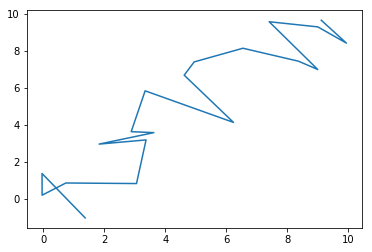

In [136]:
plt.plot(x_data, y_label)

In [137]:
error = 0

for x,y in zip(x_data, y_label):
    y_pred = m*x + b
    
    error += (y - y_pred)**2

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [138]:
init = tf.global_variables_initializer()

In [139]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1000
    
    for i in range(training_steps):
        sess.run(train)
        
        final_slope, final_intersept = sess.run([m, b])

0.92350376 0.5562902
0.44 0.87


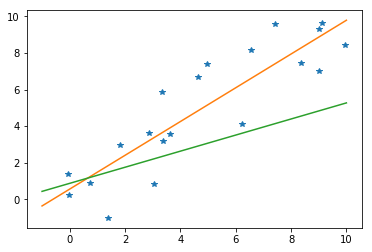

In [150]:
x_test = np.linspace(-1,10,10)

#y = mx + c
y_pred_plot = final_slope*x_test + final_intersept

sloppy = 0.44
inter = 0.87
y_wp = sloppy*x_test + inter
print(final_slope, final_intersept)
print(sloppy, inter)

plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred_plot)
plt.plot(x_test, y_wp)